# End to End Heart Disease Prediction

# Introduction:
In this notebook, it is intend to analyze data related to cardiac features of patients from the "heart.csv" dataset. This dataset provides various information about patients, including age, gender, blood pressure, cholesterol levels, electrocardiographic (ECG) features, and more.
Dataset Information:
This dataset includes the following features:

*   age: The age of the patient.
*   sex: Gender of the patient (0: female, 1: male).
*   cp: Type of chest pain.
*   trestbps: Resting blood pressure.
*   chol: Serum cholesterol.
*   fbs: Fasting blood sugar > 120 mg/dl.
*   restecg: Resting electrocardiographic results.
*   thalach: Maximum heart rate achieved.
*   exang: Exercise induced angina.
*   oldpeak: ST depression induced by exercise relative to rest.


## Importing the Libraries

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

%matplotlib inline

# Importing the Dataset

In [52]:
df = pd.read_csv('heart.csv')
# Displaying the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Preprocessing and Feature Engineering

In [53]:
# Checking for duplicate values in dataset
print("Duplicates:", df.duplicated())


Duplicates: 0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool


In [54]:
print("Missing values:\n", df.isna().sum())

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [55]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


There don't appear to be any missing values in the dataset as each column has 303 non-null entries.

In [57]:
df_corr = df.corr()
print("Correlation Matrix:\n", df_corr)

Correlation Matrix:
                age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.0

In [58]:
target_count = df['target'].value_counts()

In [59]:
target_count

target
1    165
0    138
Name: count, dtype: int64

In [60]:
print("Data Summary:\n", df.describe().T)

Data Summary:
           count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.31

In [61]:
unique = df.nunique()

In [62]:
print("Unique values per column:\n", unique)

Unique values per column:
 age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


# Visualizations
Age Distribution

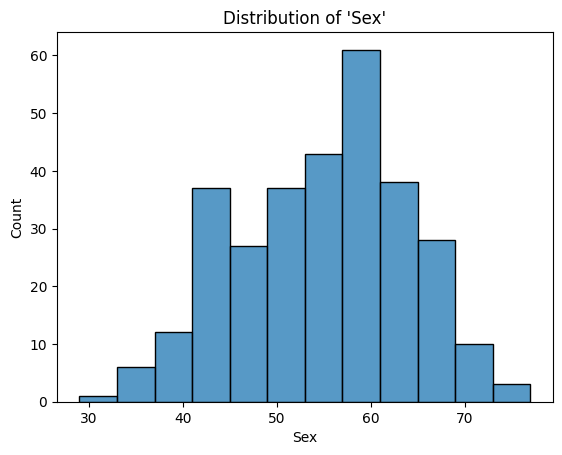

In [63]:
sns.histplot(df['age']);
plt.title("Distribution of 'Sex'")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()


Gender Distribution

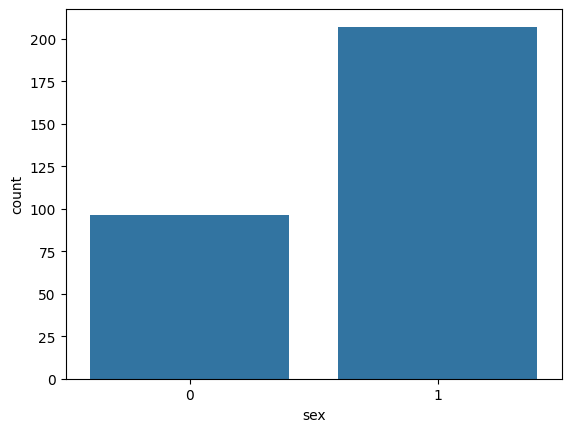

In [64]:
sns.countplot(x='sex', data=df)
plt.show()

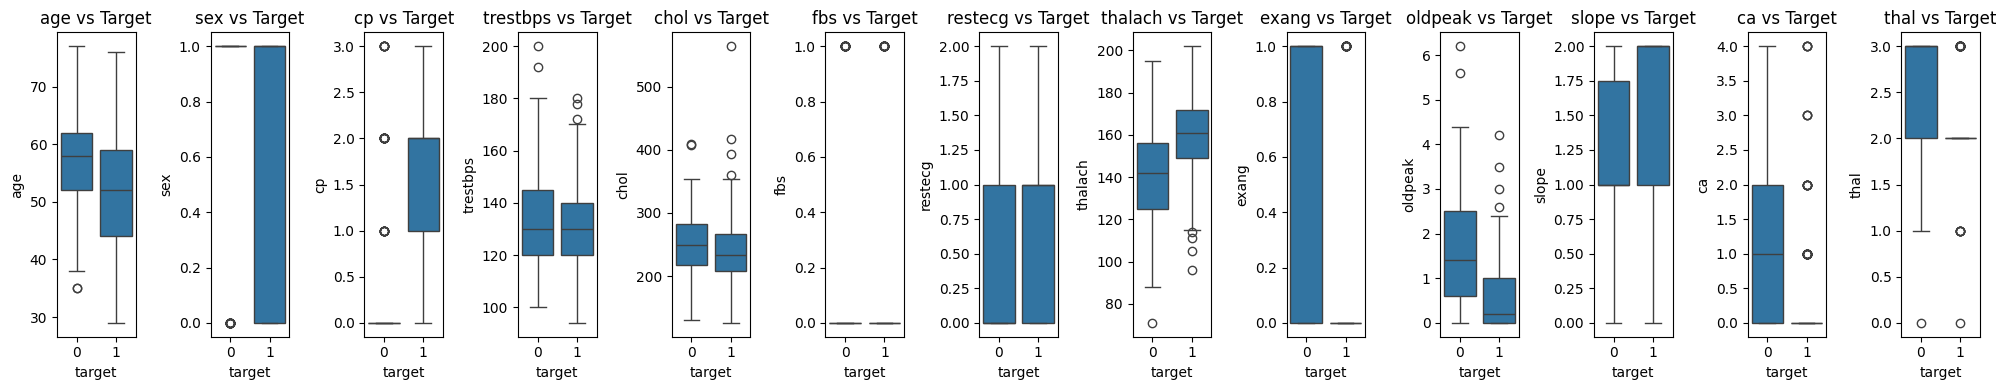

In [65]:
# Boxplots for Features vs Target
data = df.iloc[:, :-1]
target = df.iloc[:, -1]

# Combine the features and target into a single DataFrame for plotting
plot_data = data.copy()
plot_data['target'] = target

# Define the features
features = data.columns

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=13, figsize=(20, 4))  # Adjust the layout as necessary
axes = axes.flatten()

# Plot each feature against the target variable
for i, feature in enumerate(features):
    sns.boxplot(x='target', y=feature, data=plot_data, ax=axes[i])
    axes[i].set_title(f'{feature} vs Target')

# Adjust layout
plt.tight_layout()
plt.show()

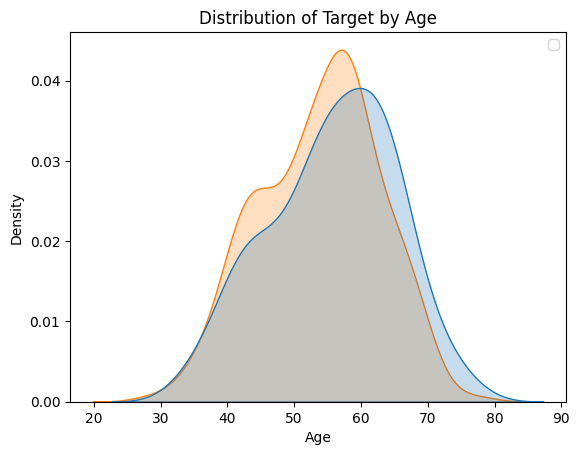

In [66]:

# KDE Plot for Age by Gender
sns.kdeplot(data=df, x='age', hue='sex', fill=True, common_norm=False)
plt.title('Distribution of Target by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show();

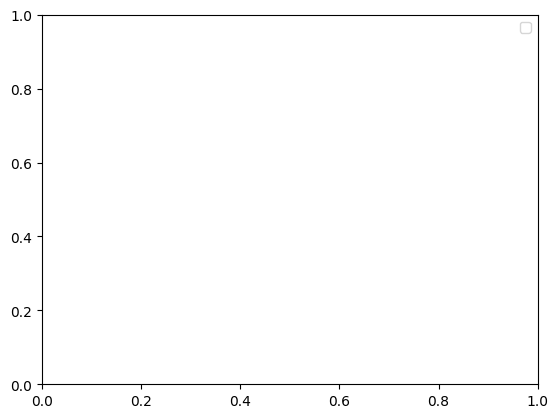

In [67]:
# Box Plot for Age Distribution by Sex
fig_box = px.box(df, x='sex', y='age', color='sex', title='Age Distribution by Sex')
fig_box.update_layout(xaxis_title='Sex', yaxis_title='Age')
fig_box.show()

# 4. Pair Plot for Pairwise Relationships
fig_pair = px.scatter_matrix(df, dimensions=['age', 'chol', 'trestbps', 'thalach'],
                             color='target', symbol='sex',
                             title='Pairwise Relationships')
fig_pair.update_layout(title='Pairwise Relationships')
plt.legend()
fig_pair.show()

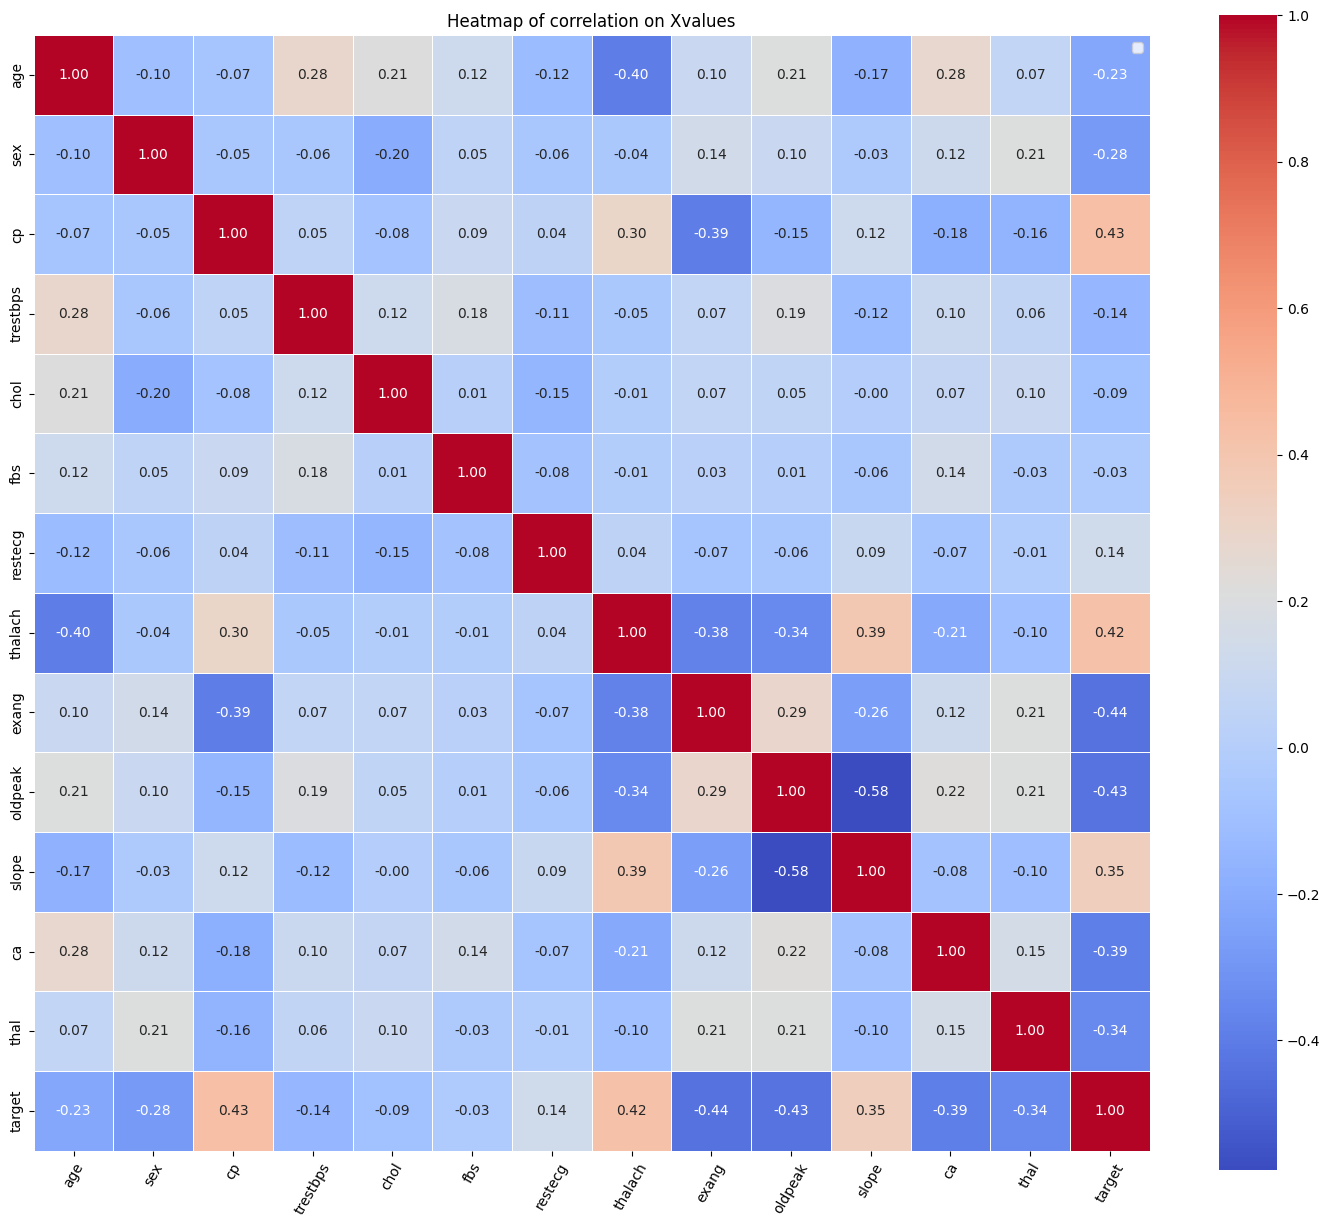

In [68]:
# Heatmap of Correlations
plt.figure(figsize=(18, 15))
sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt='.2f', square=True, linewidths=.5)
plt.title('Heatmap of correlation on Xvalues')
plt.xticks(rotation=60)
plt.legend()
plt.show()

# Preparing Data for Model Training

In [69]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [70]:
print(X)
print(y)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    


# Splitting Data into Training and Testing Sets

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y, test_size=0.2, random_state =42)

In [73]:
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (242, 13)
Shape of X_test (61, 13)
Shape of y_train (242,)
Shape of y_test (61,)


In [74]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Logistic Regression Model

In [75]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver='lbfgs', max_iter=3000)

In [76]:
lm.fit(X_train, y_train)

# Make predictions on the test data
y_pred_logistic = lm.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_logistic)
print("Mean Squared Error:", mse)

# classification model
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_logistic)

Mean Squared Error: 0.11475409836065574


In [77]:
print('accuracy_score', accuracy)

accuracy_score 0.8852459016393442


# XGBoost Model

In [78]:
!pip install xgboost folium --upgrade --quiet

In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [80]:
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgboost = xgb.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred_xgboost)
print("Mean Squared Error:", mse)

# classification model
# Evaluate the model's performance
accuracy_xgb = accuracy_score(y_test, y_pred_xgboost)
#confusion = confusion_matrix(y_test, y_pred)
#classification_rep = classification_report(y_test, y_pred)

Mean Squared Error: 0.18032786885245902


In [81]:
print('accuracy_score', accuracy_xgb)

accuracy_score 0.819672131147541


# Random Forest Model

In [82]:

from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

In [83]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [84]:
y_pred_random_forest = classifier_rf.predict(X_test)

In [85]:
accuracy_score(y_test,y_pred_random_forest)

0.8688524590163934

In [86]:
classifier_rf.oob_score_

0.7892561983471075

# Ploting Confusion Matrix

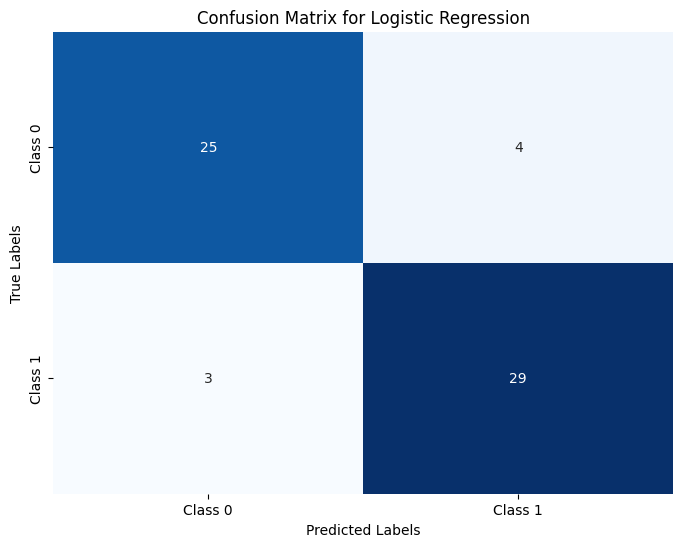

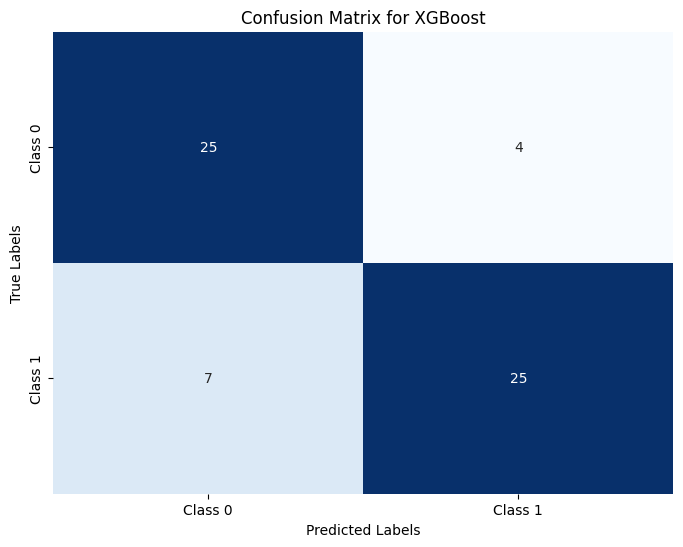

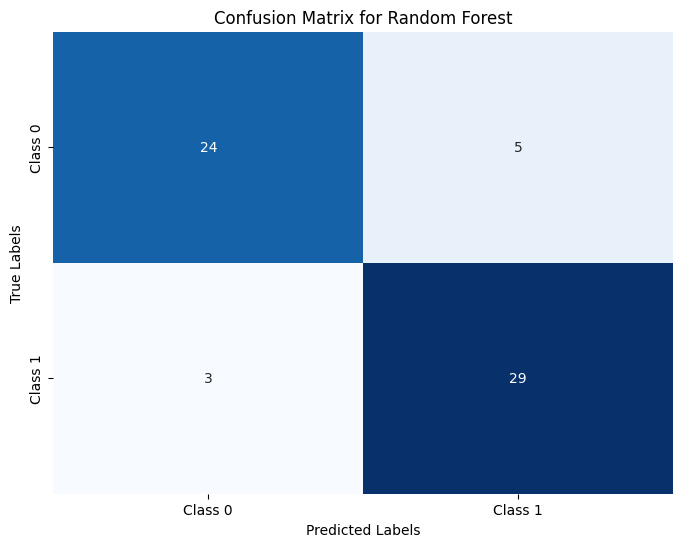

In [87]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

plot_confusion_matrix(y_test, y_pred_logistic, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_xgboost, 'XGBoost')
plot_confusion_matrix(y_test, y_pred_random_forest, 'Random Forest')


# Ploting ROC Curves

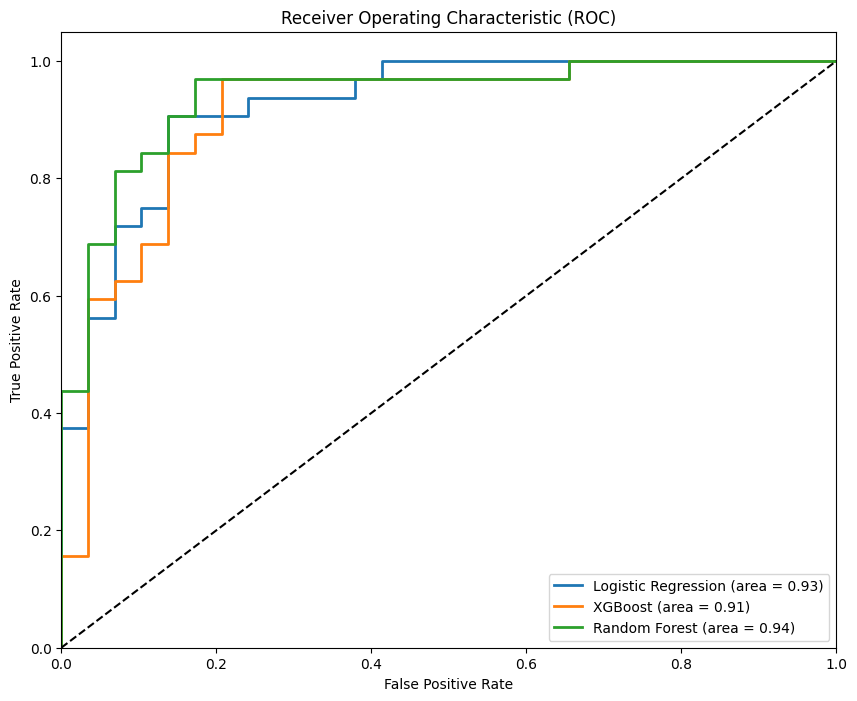

In [88]:
def plot_roc_curve(y_true, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')

plt.figure(figsize=(10, 8))
plot_roc_curve(y_test, lm.predict_proba(X_test)[:,1], 'Logistic Regression')
plot_roc_curve(y_test, xgb.predict_proba(X_test)[:,1], 'XGBoost')
plot_roc_curve(y_test, classifier_rf.predict_proba(X_test)[:,1], 'Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# Plot Prediction vs. True Values

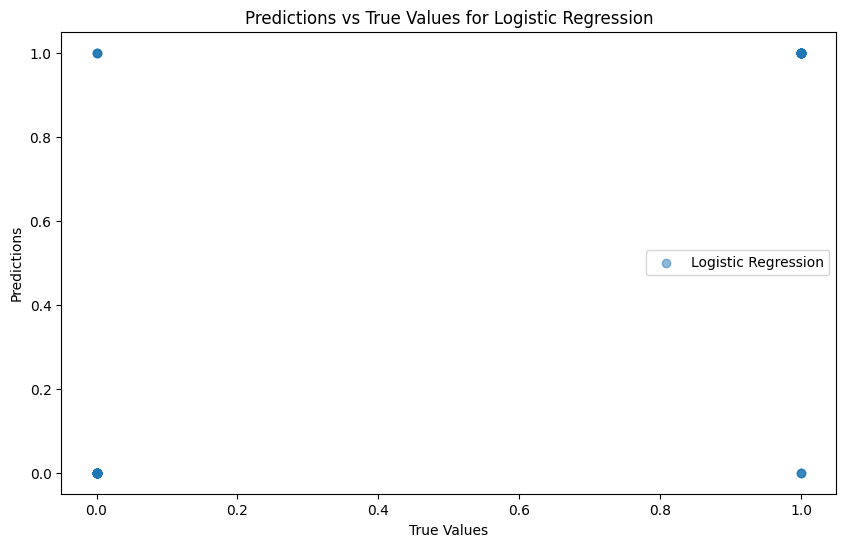

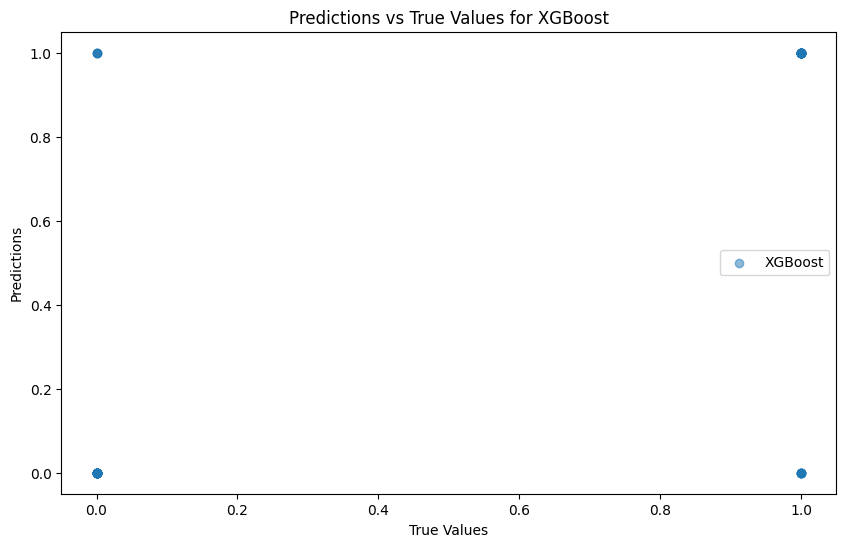

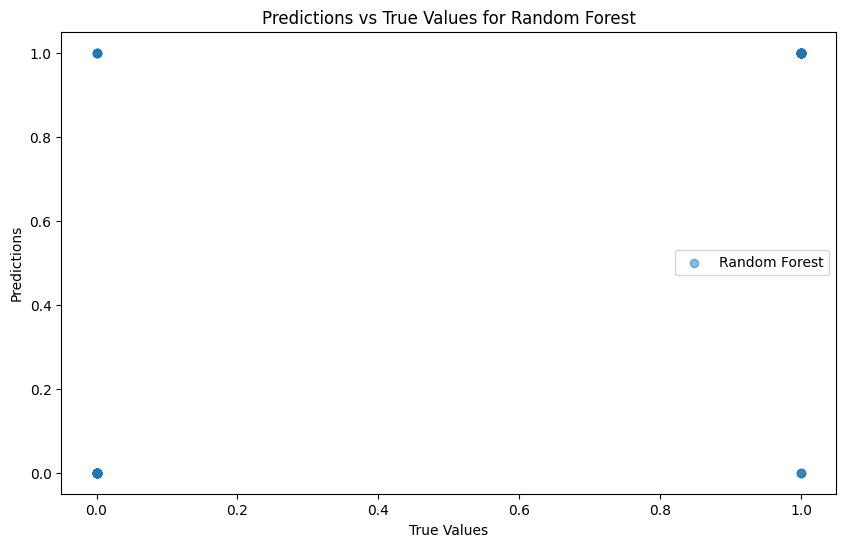

In [89]:
def plot_predictions_vs_true(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5, label=model_name)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Predictions vs True Values for {model_name}')
    plt.legend()
    plt.show()

plot_predictions_vs_true(y_test, y_pred_logistic, 'Logistic Regression')
plot_predictions_vs_true(y_test, y_pred_xgboost, 'XGBoost')
plot_predictions_vs_true(y_test, y_pred_random_forest, 'Random Forest')


Making a Prediction

In [90]:
input_text = (56,1,0,132,184,0,0,105,1,2.1,1,1,1)
np_df = np.asarray(input_text)
predicition = lm.predict(np_df.reshape(1,-1))
print(predicition)
if predicition[0] == 1:
    print("The person has Heart Disease")
else:
    print("The person do not have Heart Disease")


[0]
The person do not have Heart Disease


# Saving the Random Forest Model

In [91]:
import pickle
pickle.dump(classifier_rf,open('model.pkl','wb'))
print("Model saved as 'model.pkl'")

Model saved as 'model.pkl'
